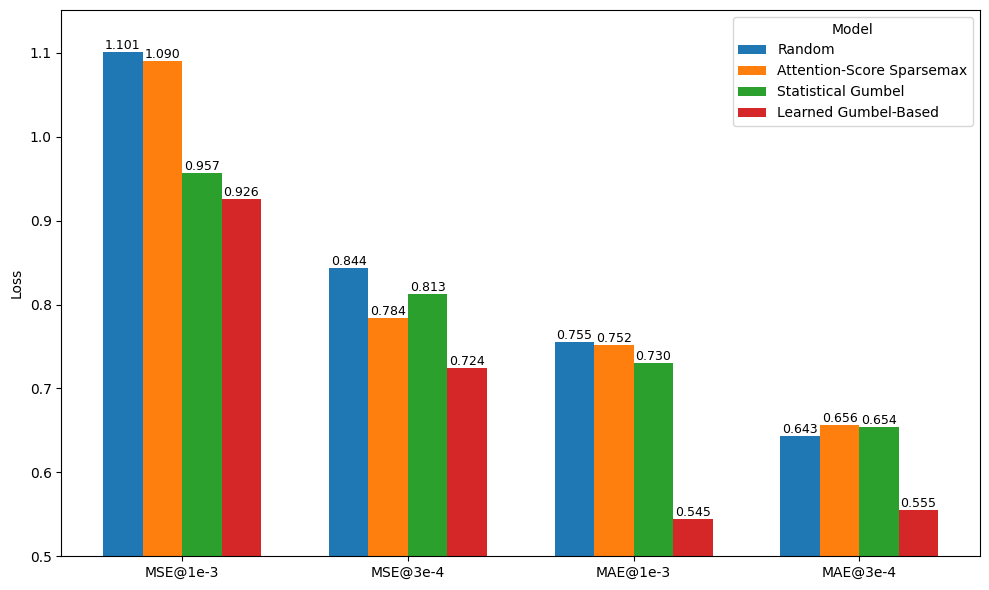

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dummy data
models = ['Random', 'Attention-Score Sparsemax', 'Statistical Gumbel', 'Learned Gumbel-Based']
metrics = ['MSE@1e-3', 'MSE@3e-4', 'MAE@1e-3', 'MAE@3e-4']

dummy_values = [
    1.101, 0.844, 0.755, 0.643,  # Random
    1.090, 0.784, 0.752, 0.656,  # Attention-Score Sparsemax
    0.957, 0.813, 0.730, 0.654,  # Statistical Gumbel
    0.926, 0.724, 0.545, 0.555   # Learned Gumbel-Based
]

df = pd.DataFrame([
    {'Model': models[i], 'Metric': metrics[j], 'Loss': dummy_values[i * len(metrics) + j]}
    for i in range(len(models)) for j in range(len(metrics))
])

# Use matplotlib for fine control with reduced inter-bar spacing
x = np.arange(len(metrics))
n_models = len(models)

# Original gap = 1 - old_cluster_width = 0.6
# Reduce this gap by half: new_gap = 0.6 * 0.5 = 0.3
new_cluster_width = 1 - 0.3  # = 0.7
bar_width = new_cluster_width / n_models
offsets = np.linspace(-new_cluster_width/2 + bar_width/2,
                      new_cluster_width/2 - bar_width/2,
                      n_models)

plt.figure(figsize=(10, 6))
for idx, model in enumerate(models):
    y = df[df.Model == model]['Loss'].values
    xi = x + offsets[idx]
    bars = plt.bar(xi, y, width=bar_width, label=model)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)

plt.ylim(0.5, df['Loss'].max() + 0.05)
plt.xticks(x, metrics)
plt.ylabel('Loss')
plt.legend(title='Model', loc='upper right', frameon=True)
plt.tight_layout()
plt.show()
